In [1]:
# Coded by Carlos Goes (Instituto Mercado Popular)

# This do file aims at
# 1. generating stationary and non-stationary data
# 2. providing examples of spurious regressions

# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define length of time series

tlength = 10000

# Define number of non-stationary series to be created

wide = 5

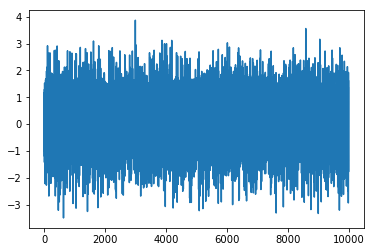

In [2]:
# Generate and plot a stationary series using the built-in command

stationary = np.random.randn(tlength)
plt.plot(stationary)
plt.show()

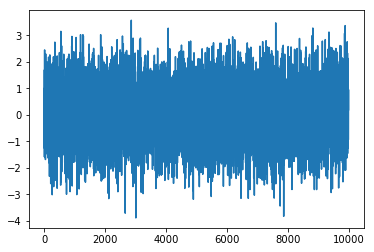

In [3]:
# Generate and plot a stationary series using a loop

holder = [] 

for i in range(tlength):
    e = np.random.randn()
    holder.append(e)

plt.plot(holder)
plt.show()

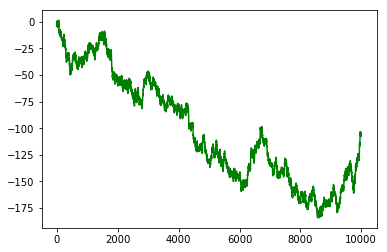

In [4]:
# Generate and plot a non-stationary series using a loop

holder = [] 

for i in range(tlength):
    if i == 0:  # generates a random observation for the first period
        b = np.random.randn()
        holder.append(b)    
    else: # adds a new random number to the past observations for subsequent observations
        e = np.random.randn()
        b = holder[i-1] + e
        holder.append(b)

plt.plot(holder, 'green')
plt.show()

In [5]:
# Generalize non-stationary as a program

def nonstationary(n):
    holder = []
    for i in range(n):
        if i == 0:
            b = np.random.randn()
            holder.append(b)    
        else:
            e = np.random.randn()
            b = holder[i-1] + e
            holder.append(b)
    return holder

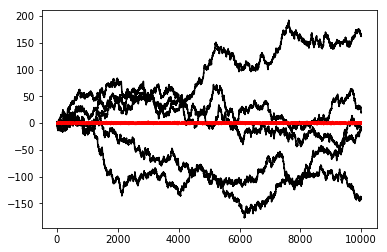

In [6]:
# Generate n nonstationary series and compare them to a stationary series

matrixns = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = nonstationary(tlength)
    matrixns[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrixns[:,i], 'black')

plt.plot(stationary, 'red')
    
plt.show()

In [7]:
# Generalize stationary series generators as a program

def arstationary(n,alpha):
    if alpha >= 1:
        print("Alpha needs to be smaller than one")
    else:
        holder = []
        for i in range(n):
            if i == 0:
                b = np.random.randn()
                holder.append(b)    
            else:
                e = np.random.randn()
                b = alpha * holder[i-1] + e
                holder.append(b)
        return holder

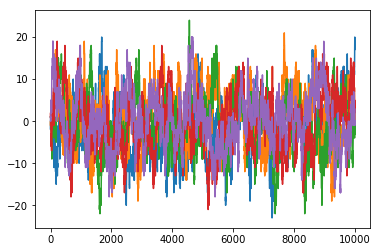

In [8]:
# Generate n nonstationary series and compare them to a stationary series

matrix = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = arstationary(tlength,0.99)
    matrix[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrix[:,i])
    
plt.show()

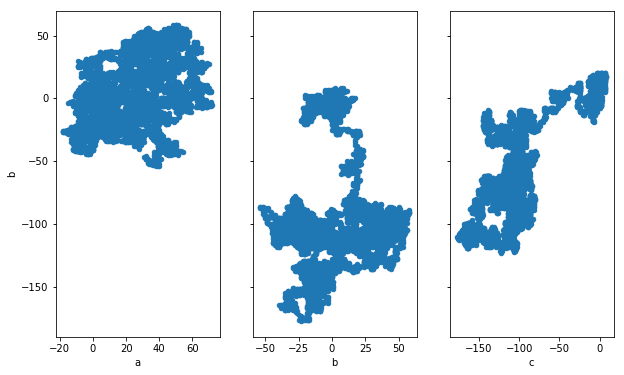

In [9]:
# Define dataframe from simulated series
df = pd.DataFrame(matrixns, columns=('a','b','c','d','e'))

fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='a', y='b', ax=axs[0], figsize=(10, 6))
df.plot(kind='scatter', x='b', y='c', ax=axs[1])
df.plot(kind='scatter', x='c', y='d', ax=axs[2])
plt.show()

In [10]:
# Fit Linear models
lm = smf.ols(formula='a ~ b', data = df).fit()
lm2 = smf.ols(formula='b ~ c', data = df).fit()
lm3 = smf.ols(formula='c ~ d', data = df).fit()
lm4 = smf.ols(formula='d ~ e', data = df).fit()

In [11]:
# Print outputs
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2486.
Date:                Tue, 14 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:33:35   Log-Likelihood:                -42672.
No. Observations:               10000   AIC:                         8.535e+04
Df Residuals:                    9998   BIC:                         8.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.4479      0.174    140.777      0.000        24.107    24.788
b              0.3447      0.007     49.860      0.000         0.331     0.358
==============================================================================
Omnibus:                      171.474   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.823
Skew:                           0.217   Prob(JB):                     4.34e-31
Kurtosis:                       2.617   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     52.35
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           4.98e-13
Time:                        18:33:35   Log-Likelihood:                -46339.
No. Observations:               10000   AIC:                         9.268e+04
Df Residuals:                    9998   BIC:                         9.270e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0111      0.634     11.062      0.000         5.769     8.254
c              0.0430      0.006      7.236      0.000         0.031     0.055
==============================================================================
Omnibus:                     1220.442   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.160
Skew:                           0.302   Prob(JB):                     3.96e-99
Kurtosis:                       2.150   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 1.141e+04
Date:                Tue, 14 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:33:35   Log-Likelihood:                -47728.
No. Observations:               10000   AIC:                         9.546e+04
Df Residuals:                    9998   BIC:                         9.548e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -50.2165      0.531    -94.582      0.000       -51.257   -49.176
d              0.8013      0.008    106.818      0.000         0.787     0.816
==============================================================================
Omnibus:                      336.444   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.737
Skew:                          -0.197   Prob(JB):                     7.00e-44
Kurtosis:                       2.433   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     2908.
Date:                Tue, 14 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:33:35   Log-Likelihood:                -49328.
No. Observations:               10000   AIC:                         9.866e+04
Df Residuals:                    9998   BIC:                         9.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -22.0005      0.774    -28.418      0.000       -23.518   -20.483
e             -0.3859      0.007    -53.928      0.000        -0.400    -0.372
==============================================================================
Omnibus:                    11267.360   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.239
Skew:                           0.184   Prob(JB):                    7.14e-149
Kurtosis:                       1.774   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""